In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


resorce_data=pd.read_csv('D:\\resources.csv')
train_data=pd.read_csv('D:\\train.csv')

print(resorce_data.columns)
print(train_data.columns)
print(resorce_data.shape)
print(train_data.shape)

Index(['id', 'description', 'quantity', 'price'], dtype='object')
Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
(1541272, 4)
(182080, 16)


In [260]:
print(train_data['project_is_approved'].value_counts())

1    154346
0     27734
Name: project_is_approved, dtype: int64


ProjectData is not blanced dataset

In [261]:
state_data = pd.DataFrame(train_data.groupby('school_state')['project_is_approved'].apply(np.mean)).reset_index()
state_data_count =pd.DataFrame(train_data.groupby('school_state')['project_is_approved'].count()).reset_index()
print(state_data_count.sort_values(by=['project_is_approved'], ascending=False ).head(10))
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
state_data.columns = ['state_code', 'num_proposals']
state_data.sort_values(by=['num_proposals'], inplace=True,ascending=False )
print("top 10 states with heighest approval % :\n",state_data.head(10))
print("Last 2 states with lowest approval % :\n",state_data.tail(2))

   school_state  project_is_approved
4            CA                25695
43           TX                12304
34           NY                12157
9            FL                10359
27           NC                 8463
14           IL                 7332
10           GA                 6636
40           SC                 6463
22           MI                 5324
38           PA                 5093
top 10 states with heighest approval % :
    state_code  num_proposals
8          DE       0.891341
50         WY       0.875706
35         OH       0.871467
6          CT       0.871294
47         WA       0.868050
49         WV       0.867700
30         NH       0.867121
28         ND       0.866935
40         SC       0.864923
41         SD       0.862348
Last 2 states with lowest approval % :
    state_code  num_proposals
43         TX       0.815670
7          DC       0.812639


DE (Delaware )State has highest % of proposal
DC (District of Columbia)State has lowest % of proposal. Here Proposal % is equal to approval % as not approval status is'0' it has no contribution to mean calculation.

# project_subject_categories Analysis

In [262]:
catogories = list(train_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

train_data['clean_categories'] = cat_list
train_data.drop(['project_subject_categories'], axis=1, inplace=True)
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,Music_Arts Health_Sports


Removing 'project_subject_categories' column and adding new coumn 'clean_categories' with formated project_subject_categories content

In [263]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
counter = Counter()
for word in train_data['clean_categories'].values:
    counter.update(word.split())
print(counter)

cat_dict = dict(counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)

Counter({'Literacy_Language': 86988, 'Math_Science': 69248, 'Health_Sports': 23712, 'SpecialNeeds': 22881, 'AppliedLearning': 20303, 'Music_Arts': 17054, 'History_Civics': 9726, 'Warmth': 2327, 'Care_Hunger': 2327})
{'Warmth': 2327, 'Care_Hunger': 2327, 'History_Civics': 9726, 'Music_Arts': 17054, 'AppliedLearning': 20303, 'SpecialNeeds': 22881, 'Health_Sports': 23712, 'Math_Science': 69248, 'Literacy_Language': 86988}


The Highest no. of projects are in Literacy_Language and least no. of projects in Care_Hunger

# project_subject_subcategories Analysis

In [264]:
sub_catogories = list(train_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
    
train_data['clean_sub_categories'] = sub_cat_list
#train_data.head(10)
train_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,Music_Arts Health_Sports,PerformingArts TeamSports


In [265]:
from collections import Counter
my_counter = Counter()
for word in train_data['clean_sub_categories'].values:
    my_counter.update(word.split())
print(my_counter)

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_sub_cat_dict)

Counter({'Literacy': 56066, 'Mathematics': 46884, 'Literature_Writing': 36974, 'SpecialNeeds': 22881, 'AppliedSciences': 17966, 'Health_Wellness': 17099, 'VisualArts': 10399, 'EnvironmentalScience': 9436, 'Gym_Fitness': 7592, 'Health_LifeScience': 7175, 'ESL': 7162, 'EarlyDevelopment': 7149, 'History_Geography': 5258, 'Music': 5172, 'College_CareerPrep': 4291, 'Other': 3948, 'TeamSports': 3643, 'CharacterEducation': 3519, 'PerformingArts': 3223, 'SocialSciences': 3149, 'Warmth': 2327, 'Care_Hunger': 2327, 'NutritionEducation': 2236, 'ForeignLanguages': 1496, 'Extracurricular': 1332, 'Civics_Government': 1294, 'ParentInvolvement': 1103, 'FinancialLiteracy': 956, 'CommunityService': 712, 'Economics': 431})
{'Economics': 431, 'CommunityService': 712, 'FinancialLiteracy': 956, 'ParentInvolvement': 1103, 'Civics_Government': 1294, 'Extracurricular': 1332, 'ForeignLanguages': 1496, 'NutritionEducation': 2236, 'Warmth': 2327, 'Care_Hunger': 2327, 'SocialSciences': 3149, 'PerformingArts': 3223

{4: 33258, 5: 32932, 3: 31087, 6: 24624, 7: 17529, 2: 14699, 8: 12140, 9: 8878, 10: 6816, 1: 52, 11: 45, 12: 17, 13: 2, 15: 1}
{15: 1, 13: 2, 12: 17, 11: 45, 1: 52, 10: 6816, 9: 8878, 8: 12140, 2: 14699, 7: 17529, 6: 24624, 3: 31087, 5: 32932, 4: 33258}


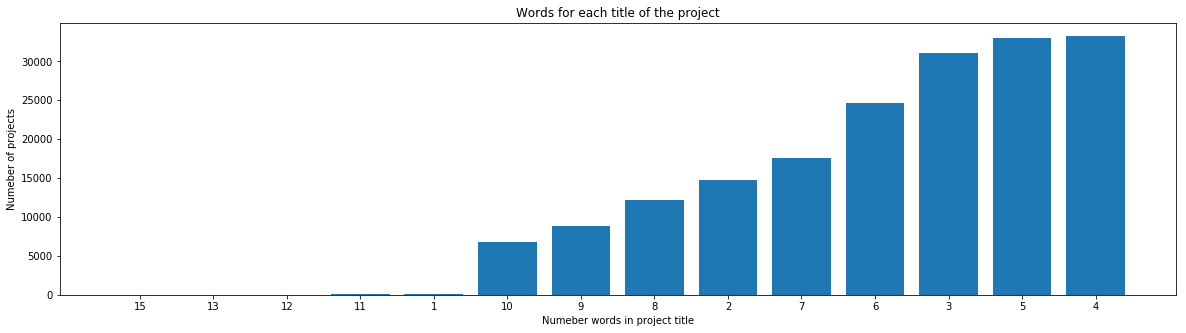

In [266]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = train_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
print(word_dict)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
print(word_dict)

xrange = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(xrange, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(xrange, list(word_dict.keys()))
plt.show()

1.Most of the projects have 4 words in the title. 
2.There are hardly any project titles containing more than 10 words. 
3.Roughly most of the projects have 3, 4 or 5 words in the title.

In [267]:
approved_title_word_count = train_data[train_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values
print(approved_title_word_count.shape)
rejected_title_word_count = train_data[train_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values
print(rejected_title_word_count.shape)

(154346,)
(27734,)


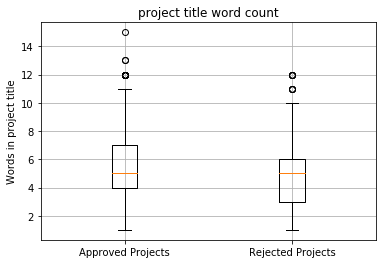

In [268]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.title("project title word count")
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

Approved Projects has slightly more number of words than rejected projects

# Text features (Project Essay's)

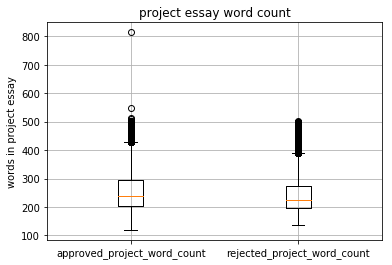

In [269]:
# merge four column essay text dataframe: 
train_data['essay'] = train_data['project_essay_1'].map(str) +\
                        train_data['project_essay_2'].map(str) + \
                        train_data['project_essay_3'].map(str) + \
                        train_data['project_essay_4'].map(str)

#print(train_data['essay'])

approved_project_essay_word_count = train_data[train_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_project_essay_word_count = approved_project_essay_word_count.values

rejected_project_essay_word_count = train_data[train_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_project_essay_word_count = rejected_project_essay_word_count.values

plt.boxplot([approved_project_essay_word_count,rejected_project_essay_word_count])
plt.title("project essay word count")
plt.xticks([1,2],('approved_project_word_count','rejected_project_word_count'))
plt.ylabel("words in project essay")
plt.grid()
plt.show()

# Cost  per Analysis

In [270]:
resorce_data.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


In [271]:
price_data = resorce_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [272]:
train_data = pd.merge(train_data, price_data, on='id', how='left')
train_data.head(5)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,price,quantity
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy,Most of my kindergarten students come from low...,299.98,6
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,Music_Arts Health_Sports,PerformingArts TeamSports,Our elementary school is a culturally rich sch...,20.00,20
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,Math_Science Literacy_Language,AppliedSciences Literature_Writing,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,469.99,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,Health_Sports,Health_Wellness,My students are the greatest students but are ...,684.47,5
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,Health_Sports,Health_Wellness,My students are athletes and students who are ...,355.50,2


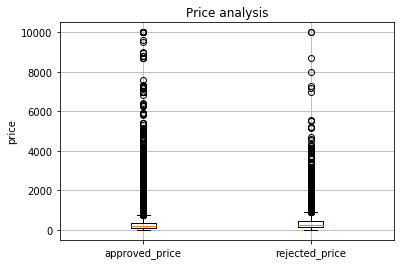

In [273]:
approved_price = train_data[train_data['project_is_approved']==1]['price'].values

rejected_price = train_data[train_data['project_is_approved']==0]['price'].values

plt.boxplot([approved_price,rejected_price])
plt.title('Price analysis')
plt.xticks([1,2],["approved_price","rejected_price"])
plt.ylabel('price')
plt.grid()
plt.show()

It is not clear from boxplot to analyze approved and rejected projects prices

D:\Python1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


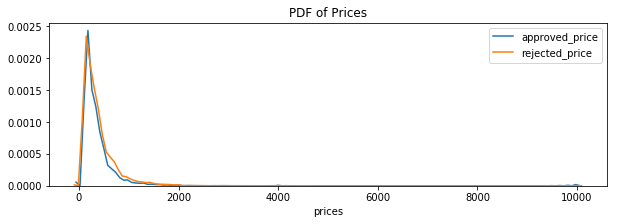

In [274]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False,label="approved_price")
sns.distplot(rejected_price, hist=False,label="rejected_price")
plt.title("PDF of Prices")
plt.legend()
plt.xlabel("prices")
plt.show()



Most of the time project price >2000 are not approved.Increase in  price less chance of approval.

# Text Processing

In [275]:
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,price,quantity
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy,Most of my kindergarten students come from low...,299.98,6
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,Music_Arts Health_Sports,PerformingArts TeamSports,Our elementary school is a culturally rich sch...,20.00,20


In [276]:
print(train_data['essay'].values[0])

Most of my kindergarten students come from low-income households and are considered \"at-risk\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \r\n\r\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of their letter sounds because of their hard work and determination. I am excited to see the places we will go from here!I currently have a differentiated

In [277]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

sent = decontracted(train_data['essay'].values[0])
print(sent)
print("___________"*10)
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

Most of my kindergarten students come from low-income households and are considered \"at-risk\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \r\n\r\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of their letter sounds because of their hard work and determination. I am excited to see the places we will go from here!I currently have a differentiated

In [233]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(train_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 182080/182080 [01:40<00:00, 1811.89it/s]


In [278]:
preprocessed_essays[3]

'my students greatest students socially economically disadvantaged we inner city school limited activities pe physical education inside violence location school located all physical activities students active within school good program most students either african american hispanic the students range enrolled kindergarten 8th grade since physical education important one success school students pe class monday friday every day the proper equipment pe not always possible asking help shelving this project kid inspired want better fitness they look back pe class said 30 minutes day they go extended day school year round school 3 00 afternoon 30 minutes physical activity they said need equipment active the students kid inspired want variety equipment life changing physical activity the student project totally kid inspired decided needed equipment keep active gaining better health this kid inspired realized needed 60 minutes physical activity school going make happen they get 30 minutes pe d

In [279]:
print(train_data['project_title'].values[5])
preprocessed_project_title=[]

for title in (train_data['project_title'].values):
    tilte =decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title =' '.join(word for word in title.split() if word not in stopwords)
    preprocessed_project_title.append(title.lower().strip())
print(preprocessed_project_title[5])

Need to Reach Our Virtual  Mentors!!!
need reach our virtual mentors


# Vectorizing categorical data

In [236]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(train_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (182080, 9)


In [280]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['clean_sub_categories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(train_data['clean_sub_categories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'ESL', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (182080, 30)


In [281]:

#One Hot Encode - School States
my_counter = Counter()
for state in train_data['school_state'].values:
    my_counter.update(state.split())

school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))


vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_categories_one_hot = vectorizer.transform(train_data['school_state'].values)
print("Shape of matrix after one hot encoding ",school_state_categories_one_hot.shape)
school_state_categories_one_hot.toarray()[1]

['VT', 'WY', 'ND', 'MT', 'RI', 'NE', 'SD', 'AK', 'NH', 'DE', 'ME', 'WV', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'UT', 'TN', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encoding  (182080, 51)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [282]:
#One Hot Encode - Project Grade Category
my_counter = Counter()
for project_grade in train_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_categories_one_hot = vectorizer.transform(train_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding ",project_grade_categories_one_hot.shape)
project_grade_categories_one_hot.toarray()[4]

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encoding  (182080, 5)


array([0, 0, 0, 0, 1], dtype=int64)

In [248]:
#One Hot Encode - Teacher Prefix
my_counter = Counter()
for teacher_prefix in train_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())

teacher_prefix_categories_one_hot = vectorizer.transform(train_data['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot.shape)
teacher_prefix_categories_one_hot.toarray()[6]

['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (182080, 6)


array([0, 0, 0, 0, 0, 0], dtype=int64)

# BOW

In [283]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (182080, 20066)


20066 are words which repeats in atleast 10 documents

In [284]:
# We are considering only the words which appeared in at least 5 documents(rows or projects).
vectorizer = CountVectorizer(min_df=5)
title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encoding ",title_bow.shape)

Shape of matrix after one hot encoding  (182080, 6691)


there are 6691 different words whic repeats in atleast 5 documents

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (182080, 20066)


In [289]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encoding  (182080, 6691)


# Vectorizing for numerical features

# Standardizing Price

In [299]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
print(scalar.fit(train_data['price'].values.reshape(-1, 1))) # finding the mean and standard deviation of this data
print("Mean : {}".format(scalar.mean_[0]))
print("Standard deviation : {}".format(np.sqrt(scalar.var_[0])))
# Now standardize the data with above maen and variance.
price_standardized = scalar.transform(train_data['price'].values.reshape(-1, 1))
print(price_standardized)

StandardScaler(copy=True, with_mean=True, with_std=True)
Mean : 297.73130437170477
Standard deviation : 366.7169949349366
[[ 0.00613196]
 [-0.75734506]
 [ 0.46973197]
 ...
 [ 0.95806494]
 [-0.73078507]
 [ 0.10980864]]


Average cost of Project is close to 298 Dollars . Majority of the projects cost less than 1000 Dollars

# Standardizing Quantity

In [301]:
scalar = StandardScaler()
print(scalar.fit(train_data['quantity'].values.reshape(-1, 1))) # finding the mean and standard deviation of this data
print("Mean : {}".format(scalar.mean_[0]))
print("Standard deviation : {}".format(np.sqrt(scalar.var_[0])))
# Now standardize the data with above maen and variance.
quantity_standardized = scalar.transform(train_data['quantity'].values.reshape(-1, 1))
print(quantity_standardized)

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)
Mean : 16.971446616871706
Standard deviation : 26.241884735084845


D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[-0.41808912]
 [ 0.11540914]
 [-0.60862422]
 ...
 [-0.11323297]
 [-0.34187509]
 [-0.5705172 ]]


Average number of resources required is 17

# Standardizing No. of previous project by teacher

In [304]:
scalar = StandardScaler()

## Finding the mean and standard deviation of this data
scalar.fit(train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

print("Mean : {}".format(scalar.mean_[0]))

print("Standard deviation : {}".format(np.sqrt(scalar.var_[0])))

# Now standardize the data with above maen and variance.
prev_projects_standardized = scalar.transform(train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(prev_projects_standardized)

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean : 11.237055140597539
Standard deviation : 28.016009085834735


D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.52694675]
 [-0.36540019]
 [-0.22262468]
 ...
 [ 1.31221206]
 [ 0.63402838]
 [-0.36540019]]


# Merging Fetures for T-SNE with BOW (projecttitle_bow)

In [309]:
from scipy.sparse import hstack
X = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot, 
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized, 
            quantity_standardized, prev_projects_standardized, title_bow))
X.shape

(182080, 6795)

In [321]:
from sklearn.manifold import TSNE
#https://stackoverflow.com/questions/7922487/how-to-transform-numpy-matrix-or-array-to-scipy-sparse-matrix
X = X.tocsr() #compressed sparse row format.
X_new = X[0:5000,:]
print(X_new.shape)

(5000, 6795)


In [322]:
status = train_data["project_is_approved"]
status_new = status[0: 5000]
status_new.shape

(5000,)

In [325]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state = 0)
tsne_data_BOW= model.fit_transform(X_new)

In [328]:
tsne_data_BOW = np.vstack((tsne_data_BOW.T, status_new)).T
tsne_df_BOW = pd.DataFrame(tsne_data_BOW, columns = ("1st_Dim","2nd_Dim","Labels"))
print(tsne_df_BOW.head(5))

     1st_Dim    2nd_Dim  Labels
0 -16.847099   7.276822     1.0
1  18.784170  22.441183     0.0
2 -11.373280  -8.176986     1.0
3   8.417384  24.179585     0.0
4  15.822306  17.147928     1.0


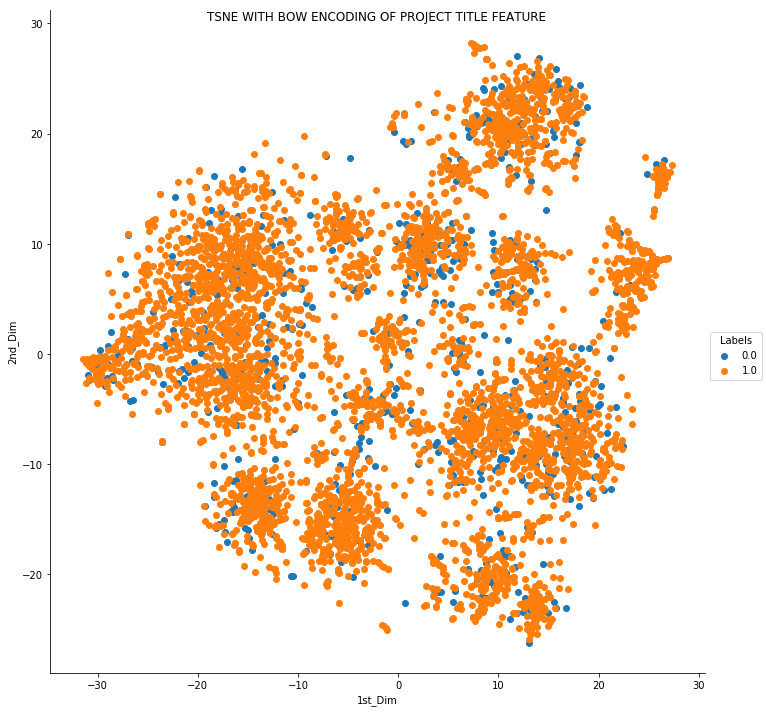

In [332]:
sns.FacetGrid(tsne_df_BOW, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim").add_legend().fig.suptitle("TSNE WITH BOW ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

From above plot it is not that clear to classify as data points are overlapping  with BOW encoding

# T-SNE with TF-IDF (project_title_tfidf)

In [333]:
X_title = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot, 
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized, 
            quantity_standardized, prev_projects_standardized, title_tfidf))
X_title.shape

(182080, 6795)

In [336]:
X_title=X_title.tocsr()
X_title_new=X_title[0:5000,:]

y_status=train_data["project_is_approved"]
y_status_new=y_status[0:5000]
y_status_new.shape

(5000,)

In [342]:
X_title_new = X_title_new
model = TSNE(n_components = 2, perplexity = 100.0, random_state = 0)
tsne_data_tfidf= model.fit_transform(X_title_new)

In [343]:
tsne_data_tfidf = np.vstack((tsne_data_tfidf.T, y_status_new)).T
tsne_df_tfidf = pd.DataFrame(tsne_data_tfidf, columns = ("1st_Dim","2nd_Dim","Labels"))
print(tsne_df_tfidf.head(5))

     1st_Dim    2nd_Dim  Labels
0   5.996119  41.501736     1.0
1  39.938747 -39.062321     0.0
2 -31.922125  -3.570728     1.0
3  32.490520 -23.837660     0.0
4  32.267136 -26.620810     1.0


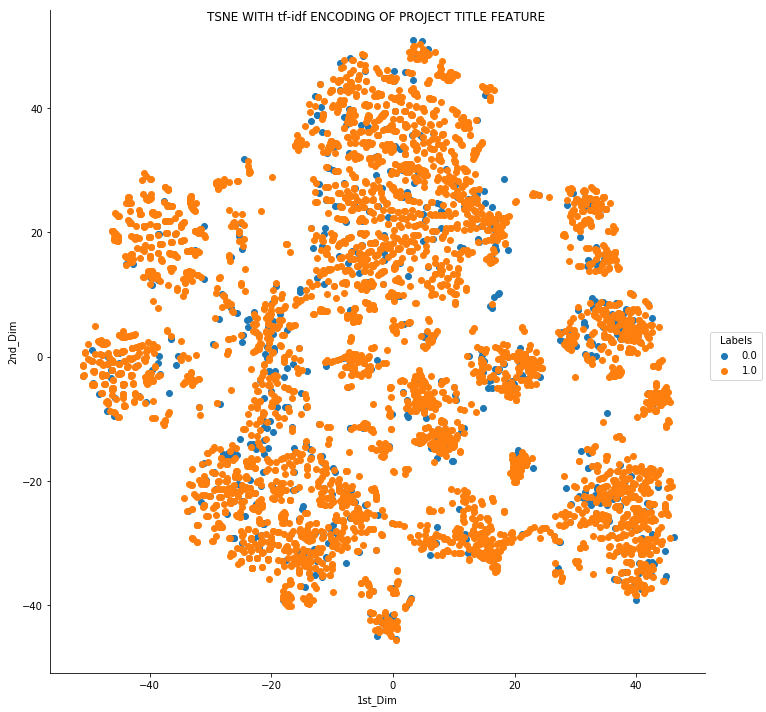

In [344]:
sns.FacetGrid(tsne_df_tfidf, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim").add_legend().fig.suptitle("TSNE WITH tf-idf ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

From above plot it is not that clear to classify as data points are overlapping with "TF_IDF" encoding

Conclusion:
    Visualiztion with TF-IDF & Bag Of Words (BOW) is not that clear as data points are overlapping.
    Hence we should try other methods.